In [1]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
sys.path.append(os.path.abspath("../src"))
import importlib
import preprocess
importlib.reload(preprocess)
from preprocess import standardize,reduce_pca
from joblib import dump

In [2]:
X=np.load("../data/X.npy")
y=np.load("../data/y.npy")
print(X.shape)
print(y.shape)

(1440, 9)
(1440,)


In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<Axes: >

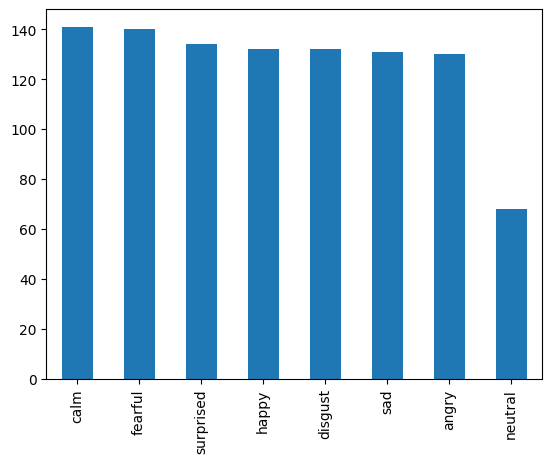

In [40]:
pd.Series(y_train).value_counts().plot(kind='bar')

In [4]:
X_train_scaled,scaler=standardize(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
X_train_pca, pca= reduce_pca(X_train_scaled, n_components=0.95)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)


(1008, 6)
(432, 6)


In [42]:
# Logistic Regression
lg= LogisticRegression(max_iter=1000)
lg.fit(X_train_scaled,y_train)
y_pred=lg.predict(X_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred,average='weighted'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("--------------------------------------------------")

Logistic Regression
Accuracy:  0.3611111111111111
F1 Score:  0.33220565334608154
Classification Report: 
               precision    recall  f1-score   support

       angry       0.56      0.47      0.51        62
        calm       0.33      0.82      0.47        51
     disgust       0.28      0.33      0.31        60
     fearful       0.25      0.21      0.23        52
       happy       0.36      0.20      0.26        60
     neutral       0.00      0.00      0.00        28
         sad       0.41      0.20      0.27        61
   surprised       0.39      0.52      0.44        58

    accuracy                           0.36       432
   macro avg       0.32      0.34      0.31       432
weighted avg       0.35      0.36      0.33       432

Confusion Matrix: 
 [[29  1 11  8  3  0  2  8]
 [ 0 42  4  1  1  0  3  0]
 [ 0 15 20  4  5  0  0 16]
 [12  7  4 11  6  0  5  7]
 [ 9 10  8 13 12  0  4  4]
 [ 0 18  3  1  2  0  1  3]
 [ 0 25 11  3  1  0 12  9]
 [ 2  8 10  3  3  0  2 30]]
------

/home/saadyaq/SE/Python/emotion_detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/saadyaq/SE/Python/emotion_detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/saadyaq/SE/Python/emotion_detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [6]:
# Random Forest
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled,y_train)
y_pred=rf.predict(X_test_scaled)
print("Random Forest")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred,average='weighted'))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("--------------------------------------------------")
dump(rf, "../models/rf.joblib")

Random Forest
Accuracy:  0.42824074074074076
F1 Score:  0.42064863547239484
Classification Report: 
               precision    recall  f1-score   support

       angry       0.63      0.47      0.54        62
        calm       0.45      0.76      0.57        51
     disgust       0.39      0.43      0.41        60
     fearful       0.35      0.33      0.34        52
       happy       0.35      0.30      0.32        60
     neutral       0.32      0.29      0.30        28
         sad       0.41      0.30      0.34        61
   surprised       0.46      0.52      0.49        58

    accuracy                           0.43       432
   macro avg       0.42      0.42      0.41       432
weighted avg       0.43      0.43      0.42       432

Confusion Matrix: 
 [[29  1  7  8  6  1  2  8]
 [ 0 39  4  0  0  3  5  0]
 [ 3  6 26  4  6  5  4  6]
 [ 5  4  0 17  8  2  9  7]
 [ 8  6  5 13 18  1  2  7]
 [ 0 10  4  2  1  8  2  1]
 [ 0 17 10  0  7  3 18  6]
 [ 1  3 10  4  6  2  2 30]]
-----------

['../models/rf.joblib']

In [47]:
#MLP¨
# Créer le modèle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam',
                    max_iter=500, random_state=42, early_stopping=True)

# Entraînement
mlp.fit(X_train_scaled, y_train_enc)
y_pred_enc = mlp.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)
# Évaluation
print("MLP Classifier")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

MLP Classifier
Accuracy:  0.3541666666666667
F1 Score:  0.33117327513914224
Classification Report: 
               precision    recall  f1-score   support

       angry       0.61      0.40      0.49        62
        calm       0.34      0.71      0.46        51
     disgust       0.28      0.32      0.30        60
     fearful       0.29      0.25      0.27        52
       happy       0.37      0.17      0.23        60
     neutral       0.00      0.00      0.00        28
         sad       0.33      0.28      0.30        61
   surprised       0.36      0.57      0.44        58

    accuracy                           0.35       432
   macro avg       0.32      0.34      0.31       432
weighted avg       0.35      0.35      0.33       432

Confusion Matrix: 
 [[25  1  8  9  4  0  2 13]
 [ 0 36  8  1  0  0  6  0]
 [ 0  9 19  4  3  0  7 18]
 [ 9  8  2 13  6  0  6  8]
 [ 7 10  5 13 10  0  7  8]
 [ 0 16  3  0  2  0  4  3]
 [ 0 21 11  3  0  1 17  8]
 [ 0  6 11  2  2  1  3 33]]


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Assure-toi que tes données sont en float32
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_enc, dtype=torch.long)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_enc, dtype=torch.long)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [49]:
class VoiceEmotionClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)


In [50]:
input_dim = X_train_torch.shape[1]
output_dim = len(torch.unique(y_train_torch))

model = VoiceEmotionClassifier(input_dim, hidden_dim=128, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [51]:
epochs = 20

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")


Epoch 1/20 - Loss: 64.0594
Epoch 2/20 - Loss: 60.1872
Epoch 3/20 - Loss: 58.1624
Epoch 4/20 - Loss: 56.5734
Epoch 5/20 - Loss: 55.6548
Epoch 6/20 - Loss: 54.7142
Epoch 7/20 - Loss: 54.2485
Epoch 8/20 - Loss: 53.7875
Epoch 9/20 - Loss: 53.1654
Epoch 10/20 - Loss: 52.7018
Epoch 11/20 - Loss: 52.0882
Epoch 12/20 - Loss: 52.4357
Epoch 13/20 - Loss: 51.9602
Epoch 14/20 - Loss: 51.3368
Epoch 15/20 - Loss: 51.3372
Epoch 16/20 - Loss: 50.7873
Epoch 17/20 - Loss: 51.0244
Epoch 18/20 - Loss: 50.6129
Epoch 19/20 - Loss: 50.1688
Epoch 20/20 - Loss: 50.3795


In [52]:
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    all_preds = []
    for xb, yb in test_loader:
        preds = model(xb)
        predicted = torch.argmax(preds, dim=1)
        all_preds.extend(predicted.tolist())
        correct += (predicted == yb).sum().item()
        total += yb.size(0)

accuracy = correct / total
print("Test Accuracy:", accuracy)


Test Accuracy: 0.38425925925925924
